## Adaline - different μ values

In [1]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [2]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.023886  , -0.00365247,  1.00115149,  0.98347931,  0.04874276],
        [-0.02049298,  0.98801792,  0.04891483,  0.98678592,  0.04329462]]),
 array([[-1, -1, -1,  1, -1]]))

In [3]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [4]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [5]:
perceptrons = []
for mu in list(np.linspace(0, 0.0025, num=100))[1:]:
    p = Adaline(x_train, d_train, x_test, d_test, mu, 0.4, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,μ,average epoch count
0,0.000025,100.00
1,0.000051,100.00
2,0.000076,99.75
3,0.000101,78.94
4,0.000126,63.34
...,...,...
94,0.002399,100.00
95,0.002424,100.00
96,0.002449,100.00
97,0.002475,100.00


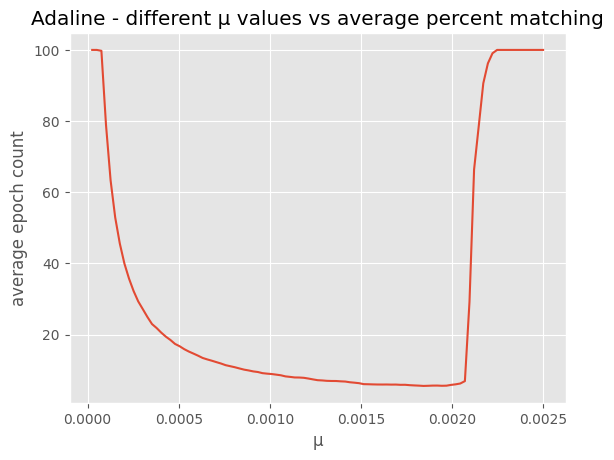

In [8]:
x, y = [x.mu for x in perceptrons], [x.average_epoch_count for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different μ values vs average percent matching")
plt.xlabel("μ")
plt.ylabel("average epoch count")
pd.DataFrame({"μ":x, "average epoch count":y})

Wartość μ reprezentuje prędkość uczenia, im większa tym szybsze uczenie, jednak przy zbyt dużej wartości pojawia się problem związany z "przeskakiwaniem" celu. Na powyższym wykresie maksymalna ilość epok to 100 (nałożona została maksymalna wartość aby zapobiec powstawaniu nieskończonej pętli), jednak ważne jest zaznaczyć, że przy braku tego typu ograniczeń wartość mogłaby roznąć w nieskończoność.

!! dodać wykres ze skutecznością

,μ,average matching percent
0,0.000025,100.0
1,0.000051,100.0
2,0.000076,100.0
3,0.000101,100.0
4,0.000126,100.0
...,...,...
94,0.002399,0.0
95,0.002424,0.0
96,0.002449,0.0
97,0.002475,0.0


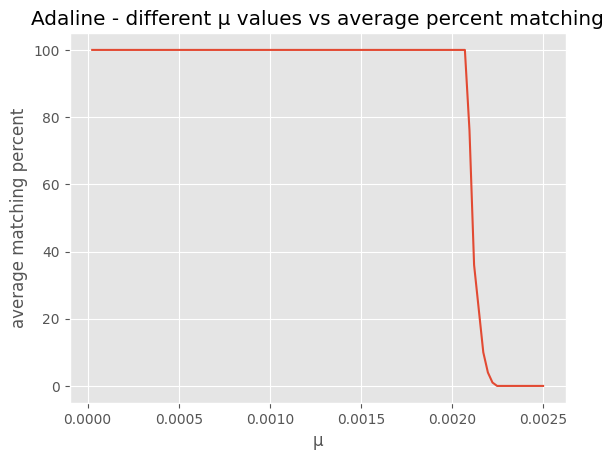

In [9]:
x, y = [x.mu for x in perceptrons], [x.average_matching_percent for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different μ values vs average percent matching")
plt.xlabel("μ")
plt.ylabel("average matching percent")
pd.DataFrame({"μ": x, "average matching percent": y})